In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# 1. Data cleaning & EDA

In [2]:
train_data=pd.read_csv('Training.csv')
test_data=pd.read_csv('Testing.csv')
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [3]:
train_data = train_data.drop(['Unnamed: 133'],axis=1)

In [23]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [5]:
train_data.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
print("Duplicates in train:", train_data.duplicated().sum())

Duplicates in train: 4616


In [12]:
print("dtypes:\n", train_data.dtypes.value_counts())

dtypes:
 int64     132
object      1
Name: count, dtype: int64


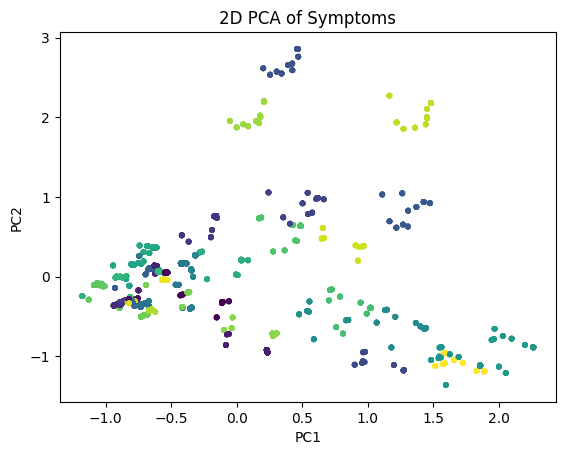

In [25]:
from sklearn.decomposition import PCA

X = train_data.drop("prognosis", axis=1)
pca = PCA(n_components=2)
proj = pca.fit_transform(X)

plt.scatter(proj[:,0], proj[:,1], c=train_data['prognosis'].astype('category').cat.codes, s=10)
plt.title("2D PCA of Symptoms")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# MODELLING

In [6]:
# Testing split
from sklearn.discriminant_analysis import StandardScaler


x_test = test_data.drop(["prognosis"], axis = 1)  
y_test = test_data["prognosis"] 

# Training split
x_train = train_data.drop(["prognosis"], axis = 1)  
y_train = train_data["prognosis"] 

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
log_reg=LogisticRegression(max_iter=1000)
# Train the model
log_reg.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred_log_reg = log_reg.predict(x_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_log_reg))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log_reg))

Accuracy: 0.98
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, x_train, y_train, cv=5, scoring='accuracy')
print("LogReg CV accuracy:", scores.mean(), "+/-", scores.std())


LogReg CV accuracy: 1.0 +/- 0.0


# NAIVE BAYES

In [8]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
print("=== Gaussian Naive Bayes ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


=== Gaussian Naive Bayes ===
Accuracy: 0.98
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold  

## Why Use Both Logistic Regression and Naive Bayes for Modeling

When building a robust diagnostic pipeline, combining a discriminative model (Logistic Regression) with a generative model (Naive Bayes) offers complementary insights and practical benefits:

1. **Different Modeling Assumptions**  
   - **Logistic Regression** learns a direct mapping from symptoms → diagnosis by fitting a decision boundary that best separates classes in feature space.  
   - **Naive Bayes** models the joint probability of symptoms and disease under a conditional‑independence assumption, then applies Bayes’ rule to compute posterior disease probabilities.  
   - **Benefit:** Comparing them highlights whether your data are better explained by a discriminative boundary or by explicit symptom–disease likelihoods.

2. **Probabilistic Interpretability**  
   - NB yields natural posterior probabilities \(P(\text{disease}\mid\text{symptoms})\) that can be easily ranked or thresholded for clinical decision rules.  
   - LR can also output probabilities, but NB’s use of priors makes it especially transparent when base‑rates vary across diseases.

3. **Handling Class Imbalance & Priors**  
   - In rare‑disease scenarios, prior disease prevalence heavily influences predictions. NB incorporates these priors directly, preventing over‑prediction of uncommon conditions.  
   - LR can include class‐weights, but NB’s generative priors often mirror real‑world incidence more naturally.

4. **Baseline & Performance Benchmark**  
   - Naive Bayes is extremely fast to train (just counting feature occurrences) and often performs surprisingly well on high‑dimensional, sparse symptom data.  
   - It serves as a solid “floor”—if LR cannot beat NB’s accuracy or calibration, it signals that added model complexity may not be paying off.

5. **Stability with Limited Data**  
   - When some diseases have few examples, LR may overfit or struggle to converge; NB’s parameter estimates (means/variances or Bernoulli counts) remain stable under small‑n, large‑p conditions.

6. **Ensemble & Consensus**  
   - By comparing or ensembling both models (e.g., soft‐voting on predicted probabilities), you can often improve overall calibration and robustness, leveraging the strengths of each.  
   - Discrepancies between the two can flag edge cases where further feature engineering or domain review is needed.

7. **Computational Efficiency**  
   - Training NB is O(n·p) with no iterative solver; LR (with regularization) involves convex optimization that can be slower on very large symptom sets.  
   - Having NB as a “quick scan” allows rapid prototyping and iterative EDA before committing to heavier LR tuning.

---

**In summary**, using both Logistic Regression and Naive Bayes gives you a richer, more interpretable modeling toolkit—combining discriminative boundaries with probabilistic generative assumptions, setting strong baselines, and enabling ensemble strategies for more reliable disease prediction.  


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best C:", grid.best_params_)


Best C: {'C': 0.01}
